# Data Filter BACI HS17 (2017 - 2020)

Name of the dataset : BACI

Version : 202201

Format : csv

Release Date : 2022 02 24

Weblink : http://www.cepii.fr/CEPII/en/bdd_modele/presentation.asp?id=37

Content : Trade flows at the year - exporter - importer - product (HS6-digits) level. Value and quantity.

List of Variables :
t: year
i: exporter
j: importer
k: product
v: value 
q: quantity

Reference : 
Gaulier, G. and Zignago, S. (2010)
BACI: International Trade Database at the Product-Level. The 1994-2007 Version. 
CEPII Working Paper, N°2010-23


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/Shareddrives/GENSyR /CSC (Ciencias Sociales Computacionales)/Revisión Bases de Datos/CEPII - BACI/BACI_HS17_V202201


ModuleNotFoundError: No module named 'google'

In [ ]:
import os
import pandas as pd
import networkx as nx
import seaborn as sns
import numpy as np

In [ ]:
# FOLDERS
FOLDER_DATA = 'BACI DATA/'
FOLDER_META = 'Metadata/'
OUTPUT = 'Processed Data/'


In [ ]:
df = pd.read_csv(OUTPUT+"Allfrom2020.csv")

# Split Data By Code

In [ ]:
df.head()

,Year,Exporter,Importer,Product category,Value,Quantity,Importer_country_code,Importer_country_name_abbreviation,Importer_country_name_full,Importer_iso_2digit_alpha,Importer_iso_3digit_alpha,Exporter_country_code,Exporter_country_name_abbreviation,Exporter_country_name_full,Exporter_iso_2digit_alpha,Exporter_iso_3digit_alpha,Product category_code,Product category_description,Product category HS[2],Product category HS[4]
0,2020,4,31,251512,27.820,169.800,31,Azerbaijan,Azerbaijan,AZ,AZE,4,Afghanistan,Afghanistan,AF,AFG,251512,"Marble and travertine: merely cut, by sawing o...",25,2515
1,2020,4,699,251512,47.296,77.000,699,India,India,IN,IND,4,Afghanistan,Afghanistan,AF,AFG,251512,"Marble and travertine: merely cut, by sawing o...",25,2515
2,2020,8,40,251512,6.167,24.000,40,Austria,Austria,AT,AUT,8,Albania,Albania,AL,ALB,251512,"Marble and travertine: merely cut, by sawing o...",25,2515
3,2020,8,56,251512,65.795,294.660,56,Belgium,Belgium,BE,BEL,8,Albania,Albania,AL,ALB,251512,"Marble and travertine: merely cut, by sawing o...",25,2515
4,2020,8,70,251512,4.662,22.500,70,Bosnia Herzegovina,Bosnia Herzegovina,BA,BIH,8,Albania,Albania,AL,ALB,251512,"Marble and travertine: merely cut, by sawing o...",25,2515


In [ ]:
# Años de transacciones
df.shape


(9955375, 20)

In [ ]:
# Filter by HS Code
def filter_product(df, product_code, hs_code='HS6'):
    """Filter by HS Code

    Args:
        df (_type_): _description_
        product_code (_type_): _description_
        hs_code (str, optional): _description_. Defaults to 'HS6'.

    Returns:
        _type_: _description_
    """
    if hs_code == 'HS6':
        bool_mask = df['Product category'] == product_code
    elif hs_code == 'HS4':
        bool_mask = df['Product category HS[4]'] == product_code
    elif hs_code == 'HS2':
        bool_mask = df['Product category HS[2]'] == product_code
        
    df_filtered = df[bool_mask]
    return df_filtered
    
# Filter by description
def filter_description(df, description):
    bool_mask = df['Product category_description'].apply(lambda x: description in x)
    df_filtered = df[bool_mask]
    return df_filtered

# Filter by Value

# Filter by Quantity

In [ ]:
df_machinary = filter_product(df, 85, hs_code='HS2')
df_machinary.to_csv(OUTPUT+"Electrical_Machinary_HS85.csv", index=False)

In [ ]:
# Filter by Description

description = 'Cereals'
df_filtered = filter_description(df, description)



In [ ]:
df_filtered

,Year,Exporter,Importer,Product category,Value,Quantity,Importer_country_code,Importer_country_name_abbreviation,Importer_country_name_full,Importer_iso_2digit_alpha,Importer_iso_3digit_alpha,Exporter_country_code,Exporter_country_name_abbreviation,Exporter_country_name_full,Exporter_iso_2digit_alpha,Exporter_iso_3digit_alpha,Product category_code,Product category_description,Product category HS[2],Product category HS[4]
1434659,2020,4,124,100890,0.272,0.061,124,Canada,Canada,CA,CAN,4,Afghanistan,Afghanistan,AF,AFG,100890,Cereals: n.e.c. in chapter 10,10,1008
1434660,2020,4,586,100890,518.988,2662.000,586,Pakistan,Pakistan,PK,PAK,4,Afghanistan,Afghanistan,AF,AFG,100890,Cereals: n.e.c. in chapter 10,10,1008
1434661,2020,24,516,100890,0.007,0.040,516,Namibia,Namibia,NaN,NAM,24,Angola,Angola,AO,AGO,100890,Cereals: n.e.c. in chapter 10,10,1008
1434662,2020,32,56,100890,164.590,336.865,56,Belgium,Belgium,BE,BEL,32,Argentina,Argentina,AR,ARG,100890,Cereals: n.e.c. in chapter 10,10,1008
1434663,2020,32,124,100890,0.002,NA,124,Canada,Canada,CA,CAN,32,Argentina,Argentina,AR,ARG,100890,Cereals: n.e.c. in chapter 10,10,1008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950937,2020,768,528,100840,28.598,9.892,528,Netherlands,Netherlands,NL,NLD,768,Togo,Togo,TG,TGO,100840,Cereals: fonio (Digitaria spp.),10,1008
9950938,2020,768,757,100840,0.183,0.037,757,Switzerland,"Switzerland, Liechtenstein",CH,CHE,768,Togo,Togo,TG,TGO,100840,Cereals: fonio (Digitaria spp.),10,1008
9950939,2020,768,842,100840,281.118,108.455,842,USA,"USA, Puerto Rico and US Virgin Islands",US,USA,768,Togo,Togo,TG,TGO,100840,Cereals: fonio (Digitaria spp.),10,1008
9950940,2020,854,251,100840,6.227,2.228,251,France,"France, Monaco",FR,FRA,854,Burkina Faso,Burkina Faso,BF,BFA,100840,Cereals: fonio (Digitaria spp.),10,1008


In [ ]:
df_merge = df_filtered.groupby(by=['Exporter','Importer','Importer_country_name_abbreviation', 'Exporter_country_name_abbreviation']).sum()
df_merge['description'] = description
df_merge.reset_index(inplace=True)
df_merge.to_csv(OUTPUT+description+'2020'+'.csv', index=True)
df_merge

,Exporter,Importer,Importer_country_name_abbreviation,Exporter_country_name_abbreviation,Year,Product category,Value,Importer_country_code,Exporter_country_code,Product category_code,Product category HS[2],Product category HS[4],description
0,4,124,Canada,Afghanistan,2020,100890,0.272,124,4,100890,10,1008,Cereals
1,4,508,Mozambique,Afghanistan,2020,100590,17.644,508,4,100590,10,1005,Cereals
2,4,586,Pakistan,Afghanistan,20200,1005931,2030.016,5860,40,1005931,100,10055,Cereals
3,4,784,United Arab Emirates,Afghanistan,2020,100111,7.587,784,4,100111,10,1001,Cereals
4,8,724,Spain,Albania,2020,100620,0.067,724,8,100620,10,1006,Cereals
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6445,894,716,Zimbabwe,Zambia,18180,905619,13522.808,6444,8046,905619,90,9053,Cereals
6446,894,748,Swaziland,Zambia,2020,100510,590.310,748,894,100510,10,1005,Cereals
6447,894,792,Turkey,Zambia,2020,100590,0.009,792,894,100590,10,1005,Cereals
6448,894,800,Uganda,Zambia,4040,201360,283.151,1600,1788,201360,20,2013,Cereals


In [ ]:
dict_county = df_merge[['Exporter',	'Importer',	'Importer_country_name_abbreviation',	'Exporter_country_name_abbreviation']].to_dict('series')

# Filter Graph

In [ ]:
G = nx.DiGraph()
for row in df_merge.iterrows():
    G.add_weighted_edges_from([(row[1]['Exporter'], row[1]['Importer'], row[1]['Value'])])

In [ ]:
# add labels to nodes
df_country = pd.read_csv('Metadata\country_codes_V202201.csv', encoding='latin-1')
country_dict_raw = df_country.to_dict('series')
country_dict = dict(zip(country_dict_raw['country_code'], country_dict_raw['country_name_abbreviation']))

In [ ]:
# re label nodes with country names
G_labels = nx.relabel_nodes(G, country_dict, copy=True)

In [ ]:
# Filter Graph by value
def filger_graph_by_value(G, value):
    G_new = nx.DiGraph(((source, target, attr) for source, target, attr in G.edges(data=True) if attr['weight'] > value))
    return G_new

In [ ]:
### log array of values
thresholds = np.logspace(-3, 7, num=50, base=10)
density = []
number_edges = []
for i in thresholds:
    G_new = filger_graph_by_value(G_labels, i)
    density.append(nx.density(G_new))
    number_edges.append(G_new.number_of_edges())


In [ ]:
G_new.edges(data=True)

OutEdgeDataView([])

In [ ]:
G_new.number_of_edges()

0

In [ ]:
df_thresholds = pd.DataFrame(list(zip(density, thresholds, number_edges)), columns=['Density', 'Thresholds', 'No Edges'])

In [ ]:
df_thresholds

,Density,Thresholds,No Edges,Log_Thresholds
0,0.127639,1.000000e-03,6433,-3.000000
1,0.127639,1.599859e-03,6433,-2.795918
2,0.127401,2.559548e-03,6421,-2.591837
3,0.127083,4.094915e-03,6405,-2.387755
4,0.126706,6.551286e-03,6386,-2.183673
5,0.126151,1.048113e-02,6358,-1.979592
6,0.125198,1.676833e-02,6310,-1.775510
7,0.125400,2.682696e-02,6264,-1.571429
8,0.124019,4.291934e-02,6195,-1.367347
9,0.122618,6.866488e-02,6125,-1.163265


In [ ]:
df_thresholds['Log_Thresholds'] = np.log10(df_thresholds['Thresholds'])

In [ ]:
nx.write_graphml(G_labels,'Cereals2020.graphml')

<AxesSubplot:xlabel='Log_Thresholds', ylabel='No Edges'>

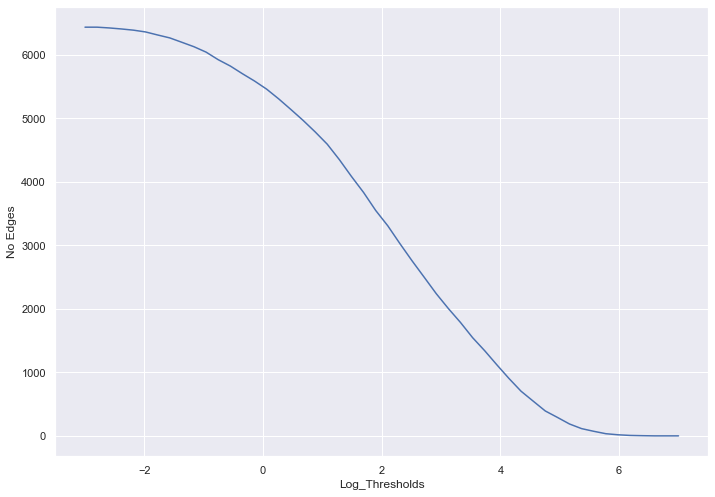

In [ ]:
# Exploration
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_theme(style="darkgrid")
sns.lineplot(x="Log_Thresholds", y="No Edges",
             data=df_thresholds)

<AxesSubplot:xlabel='Thresholds', ylabel='No Edges'>

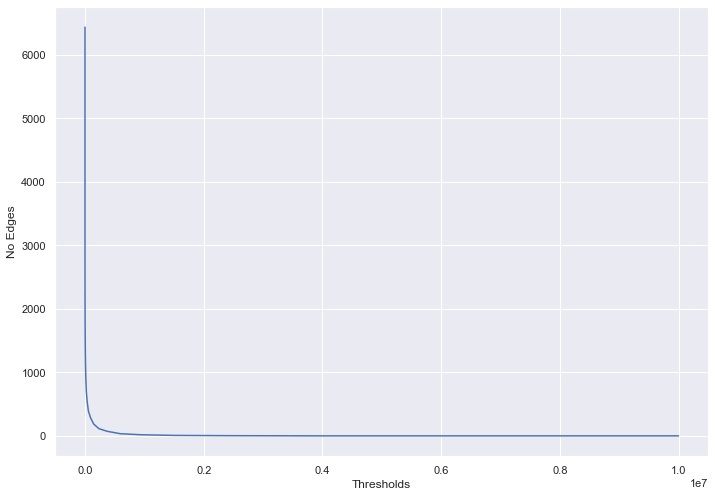

In [ ]:
sns.lineplot(x="Thresholds", y="No Edges",
             data=df_thresholds)